In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
import re

import matplotlib.colors as mcolors
import matplotlib.font_manager as font_manager
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
fontlegend = font_manager.FontProperties(family='serif',
                                   weight='heavy',
                                   #style = 'italic', 
                                   size = 16)

['lep_ava_1024.dat', 'lep_ava_8192.dat', 'lep_ava_16.dat', 'lep_ava_16384.dat', 'lep_ava_4096.dat', 'lep_ava_2.dat', 'lep_ava_8.dat', 'lep_ava_128.dat', 'lep_ava_512.dat', 'lep_ava_64.dat']


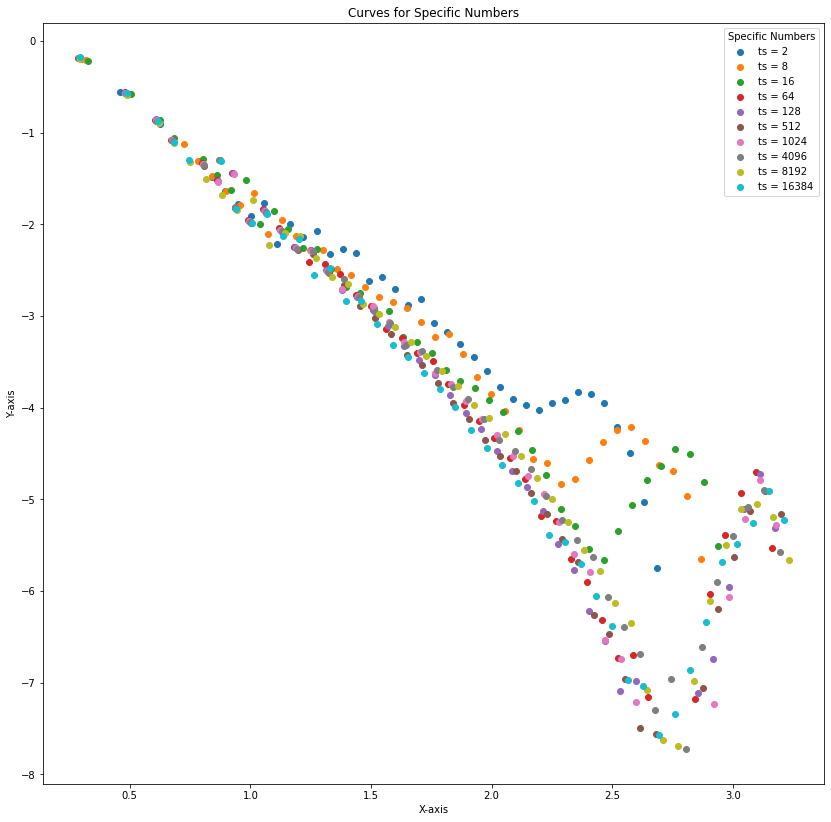

In [20]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt

# Specify the folder path containing the .dat files
folder_path = '/home/robert/data_zurik/avalanche'

# Define the list of specific numbers
ts = [1024, 8192, 16, 16384, 4096, 2, 8, 128, 512, 64]
specific_numbers = sorted(ts)  # Sort the list in ascending order

# Get a list of all .dat files in the folder
dat_files = [file for file in os.listdir(folder_path) if file.endswith(".dat")]
print(dat_files)

# Create a dictionary to map specific numbers to file names
number_file_map = {}

# Iterate over each .dat file
for file_name in dat_files:
    # Extract the number from the file name using regular expressions
    number_match = re.search(r"\d+", file_name)
    if number_match:
        file_number = int(number_match.group())
    else:
        continue

    # Check if the file number is in the specific numbers list
    if file_number in specific_numbers:
        number_file_map[file_number] = file_name

# Set up the plot
plt.figure(figsize=(14, 14))

curve_data = []
# Iterate over specific numbers in ascending order
for file_number in specific_numbers:
    if file_number in number_file_map:
        file_name = number_file_map[file_number]
        file_path = os.path.join(folder_path, file_name)
        data = np.loadtxt(file_path)

        # Separate the columns
        x = data[:, 0]
        y = data[:, 1]

        # Save the data for the curve in a tuple and append to the list
        curve_data.append((file_number, x, y))

        # Plot the curve
        label = 'ts = %d' % file_number
        plt.scatter(x, y, label=label)

# Set plot labels, title, and legend
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend(loc='upper right', prop={'size': 10}, title='Specific Numbers')
plt.title("Curves for Specific Numbers")

# Show the plot
plt.show()


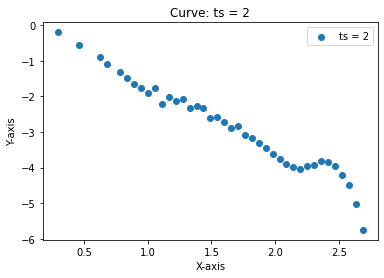

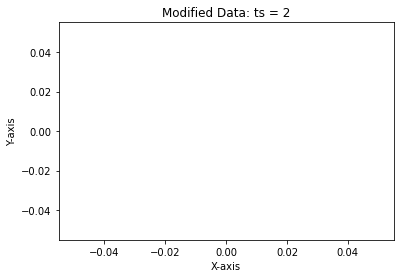

In [21]:
import matplotlib.pyplot as plt

# Select a specific curve from curve_data (e.g., the first curve)
curve_index = 0
selected_curve = curve_data[curve_index]
file_number, x, y = selected_curve

# Plot the selected curve
plt.scatter(x, y, label='ts = %d' % file_number)
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Curve: ts = %d" % file_number)
plt.legend(loc='upper right')
plt.show()

# Define the x value to cut the data at
cut_x = 10.0

# Find the index where x crosses the cut value
cut_index = np.argmax(x > cut_x)

# Keep only the data before the cut_index
x = x[:cut_index]
y = y[:cut_index]

# Plot the modified data
plt.scatter(x, y)
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Modified Data: ts = %d" % file_number)
plt.show()


In [22]:
curve_data[0]

(2,
 array([0.29820594, 0.46086373, 0.62352152, 0.67774078, 0.7861793 ,
        0.84039857, 0.89461783, 0.94883709, 1.00305635, 1.05727562,
        1.11149488, 1.16571414, 1.2199334 , 1.27415267, 1.32837193,
        1.38259119, 1.43681045, 1.49102972, 1.54524898, 1.59946824,
        1.6536875 , 1.70790676, 1.76212603, 1.81634529, 1.87056455,
        1.92478381, 1.97900308, 2.03322234, 2.0874416 , 2.14166086,
        2.19588013, 2.25009939, 2.30431865, 2.35853791, 2.41275718,
        2.46697644, 2.5211957 , 2.57541496, 2.62963423, 2.68385349]),
 array([-0.19633209, -0.55952091, -0.90539549, -1.08890777, -1.30880769,
        -1.48615553, -1.63757012, -1.77431321, -1.90599146, -1.76360367,
        -2.21141271, -2.00206275, -2.13448135, -2.07448574, -2.32936446,
        -2.27488629, -2.31567382, -2.61505031, -2.57076107, -2.70997469,
        -2.87566794, -2.81693728, -3.07638301, -3.17016709, -3.30447467,
        -3.45211562, -3.60566437, -3.77128689, -3.91005107, -3.97002267,
        -4.0

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [63]:

def cut_data(x, y, cut_x=2.5):
    # Find the indices where x crosses the cut value
    cut_indices = np.where(x < cut_x)[0]
    #print(cut_indices)
    
    # Check if any cut indices were found
    if len(cut_indices) > 0:
        # Get the last index where x crosses the cut value
        cut_index = cut_indices[-1] + 1
    else:
        # No cut indices were found, set cut_index to the length of x
        cut_index = len(x)
    
    # Keep only the data before the cut_index
    x = x[:cut_index]
    y = y[:cut_index]

    #print(x)
    #print(y)
    return x,y

def analyse_data_ava(curve_data, curve_index, cut_x=2.75):
    ##read data
    file_number, x, y = curve_data[curve_index]
    #print(curve_data[curve_index])

    ## cut data
    x, y = cut_data(x, y, cut_x)

    ## linear regression
    # Reshape the data if needed
    x = x.reshape(-1, 1)
    y = y.reshape(-1, 1)
    #print(x, y)
    # Create a linear regression model
    model = LinearRegression()

    # Fit the model to the data
    model.fit(x, y)

    # Get the coefficients (slope and intercept)
    slope = model.coef_[0][0]
    intercept = model.intercept_[0]

    # Calculate predicted y values
    y_pred = model.predict(x)

    # Calculate regression metrics
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)

    # Return the regression results
    return slope, intercept, mse, r2, x, y, y_pred


In [67]:
curve_data[0]

(2,
 array([0.29820594, 0.46086373, 0.62352152, 0.67774078, 0.7861793 ,
        0.84039857, 0.89461783, 0.94883709, 1.00305635, 1.05727562,
        1.11149488, 1.16571414, 1.2199334 , 1.27415267, 1.32837193,
        1.38259119, 1.43681045, 1.49102972, 1.54524898, 1.59946824,
        1.6536875 , 1.70790676, 1.76212603, 1.81634529, 1.87056455,
        1.92478381, 1.97900308, 2.03322234, 2.0874416 , 2.14166086,
        2.19588013, 2.25009939, 2.30431865, 2.35853791, 2.41275718,
        2.46697644, 2.5211957 , 2.57541496, 2.62963423, 2.68385349]),
 array([-0.19633209, -0.55952091, -0.90539549, -1.08890777, -1.30880769,
        -1.48615553, -1.63757012, -1.77431321, -1.90599146, -1.76360367,
        -2.21141271, -2.00206275, -2.13448135, -2.07448574, -2.32936446,
        -2.27488629, -2.31567382, -2.61505031, -2.57076107, -2.70997469,
        -2.87566794, -2.81693728, -3.07638301, -3.17016709, -3.30447467,
        -3.45211562, -3.60566437, -3.77128689, -3.91005107, -3.97002267,
        -4.0

In [ ]:
slope, intercept, mse, r2, x, y, y_pred = analyse_data_ava(curve_data, 0, 2.5)

Curve 2 - Angular Coefficient (Slope): -1.9109558424523319, Intercept: 0.22653047150918626
Mean Squared Error (MSE): 0.01566696477823327, R-squared (R2) Score: 0.9840811548166559
------------------------------------
Curve 8 - Angular Coefficient (Slope): -2.1114597825501376, Intercept: 0.3961967319680362
Mean Squared Error (MSE): 0.016997687958769544, R-squared (R2) Score: 0.9854769257737046
------------------------------------
Curve 16 - Angular Coefficient (Slope): -2.2602170365559506, Intercept: 0.5303168292602223
Mean Squared Error (MSE): 0.0044218909340044505, R-squared (R2) Score: 0.9966560174569172
------------------------------------
Curve 64 - Angular Coefficient (Slope): -2.4272176436293624, Intercept: 0.6330133468589874
Mean Squared Error (MSE): 0.010427059464936755, R-squared (R2) Score: 0.9932765295002854
------------------------------------
Curve 128 - Angular Coefficient (Slope): -2.4982412489313814, Intercept: 0.696090698472938
Mean Squared Error (MSE): 0.01117596838349

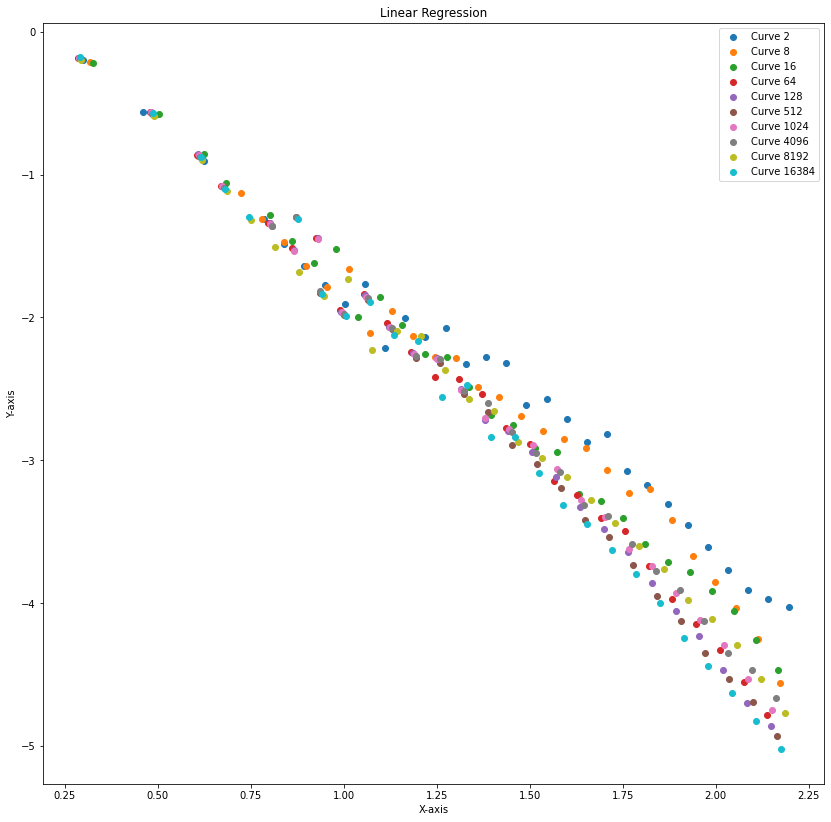

In [66]:
import matplotlib.pyplot as plt

cut = [2.25, 2.2, 2.2, 2.2, 2.2, 2.2, 2.2, 2.2, 2.2, 2.2]
curve_index = [0,1, 2,3, 4,5, 6,7, 8, 9]


plt.figure(figsize=(14,14))
# Plot selected curves
for i in curve_index:
    slope, intercept, mse, r2, x, y, y_pred = analyse_data_ava(curve_data, i, cut[i])
    file_name = curve_data[i][0]
    # Print the regression results for each curve
    print(f"Curve {file_name} - Angular Coefficient (Slope): {slope}, Intercept: {intercept}")
    print(f"Mean Squared Error (MSE): {mse}, R-squared (R2) Score: {r2}")
    print("------------------------------------")
    # Plot the data points for each curve with the same color
    plt.scatter(x, y, label=f'Curve {file_name}')

    # Plot the fitted regression line for each curve with the same color
    #plt.plot(x, y_pred, label=f'Regression - Curve {file_name}')

# Set labels and title
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Linear Regression")

# Set legend
plt.legend()

# Show the plot
plt.show()


In [96]:


from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
def regree(x,y):

    # Criando o objeto de regressão linear
    model = LinearRegression()
    # Ajustando o modelo aos dados
    model.fit(x.reshape((-1,1)), y)

    # Obtendo o coeficiente angular
    coef_angular = model.coef_[0]
    coef_linear = model.intercept_
    # Obtendo o coeficiente de determinação (R²)
    y_pred = model.predict(x.reshape((-1,1)))
    r_squared = r2_score(y, y_pred)
    return coef_angular,coef_linear,r_squared

In [ ]:
cut_init = [1,1, 1,]
cut_fin = [2.3, 2.34, 2.5]

32
27
28
27
27
27
27
27
27
29


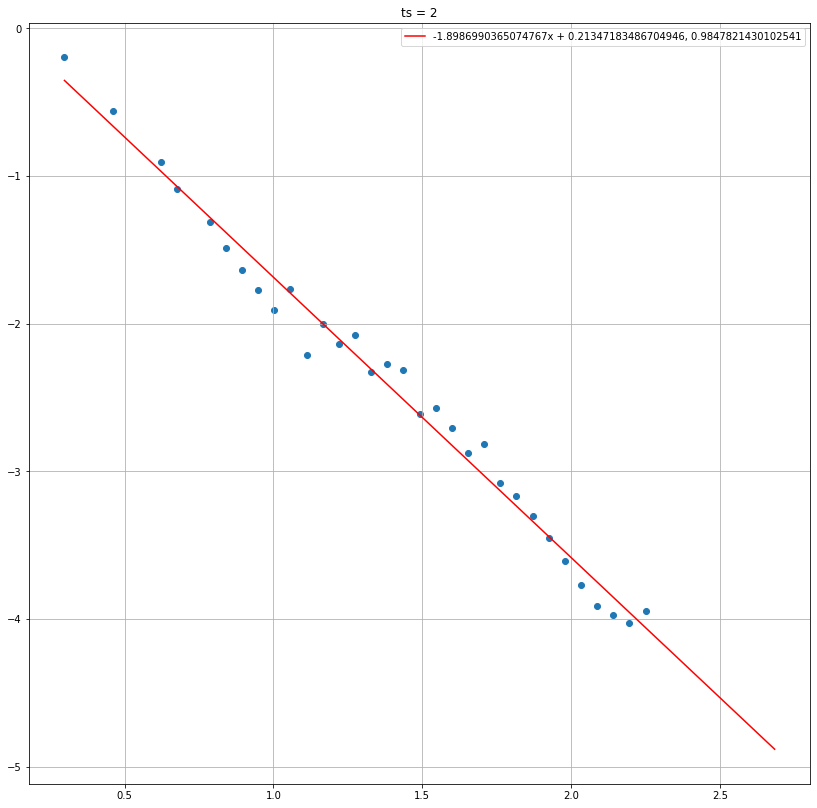

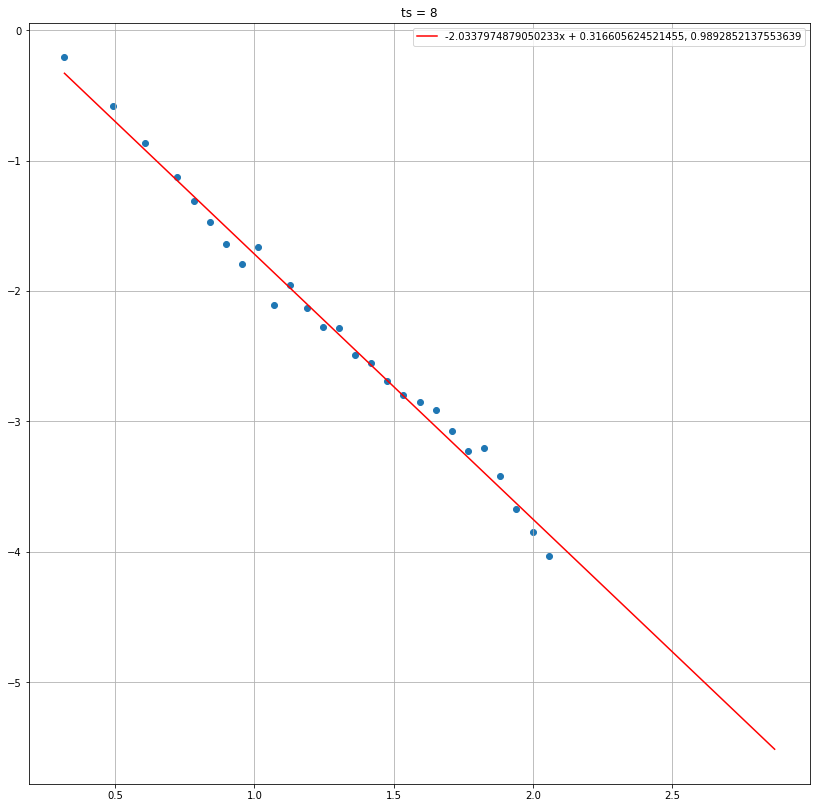

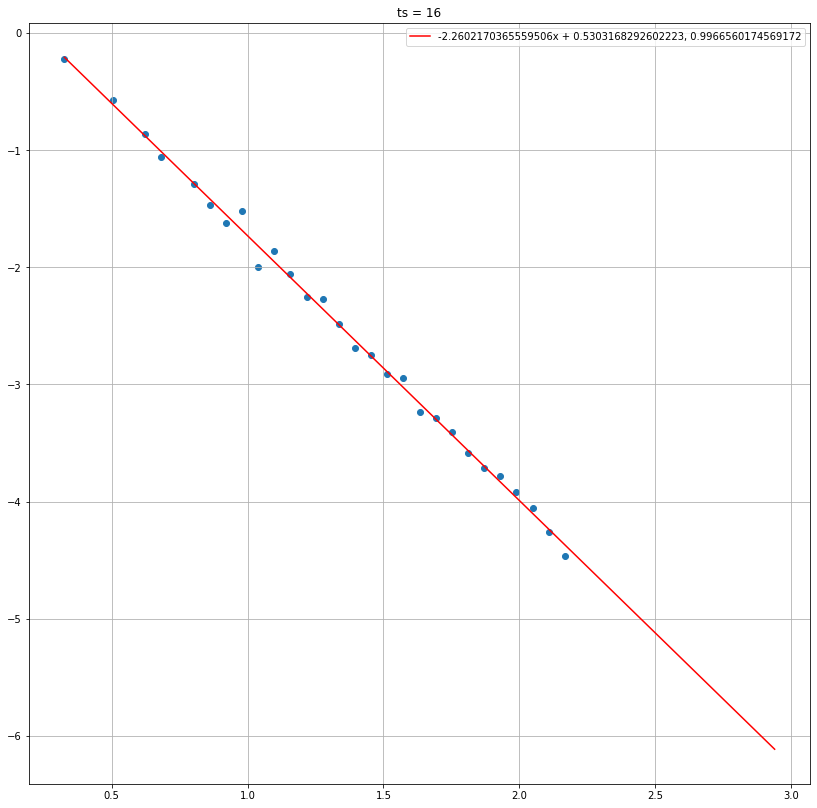

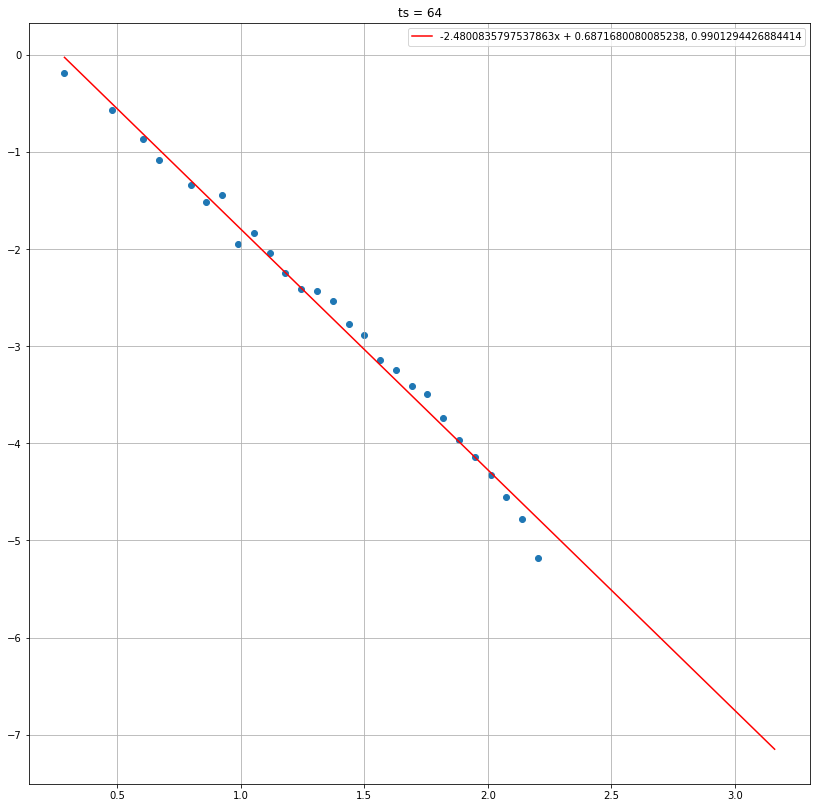

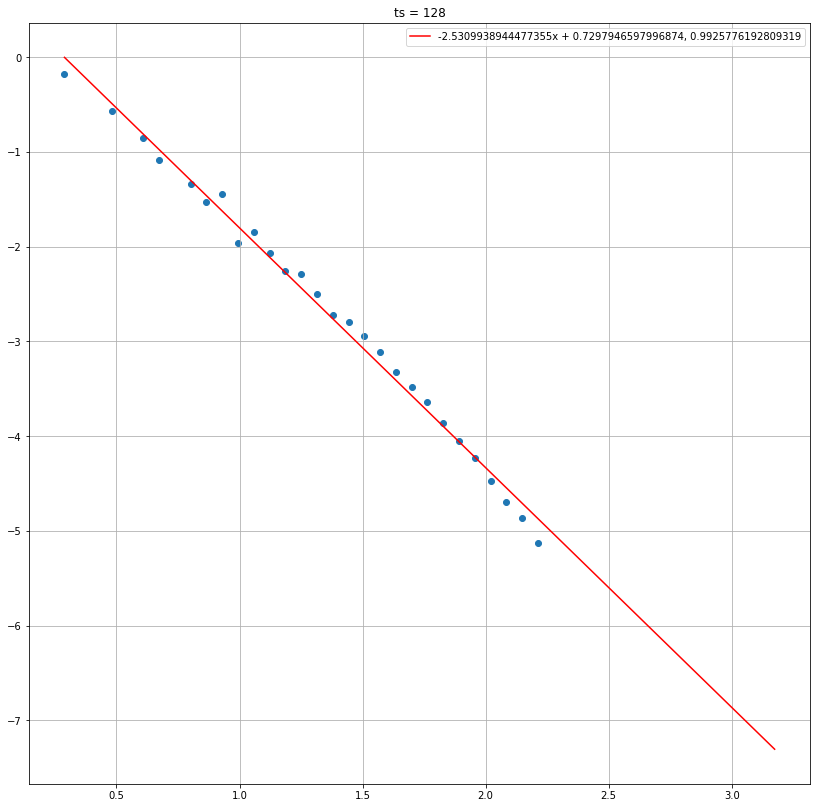

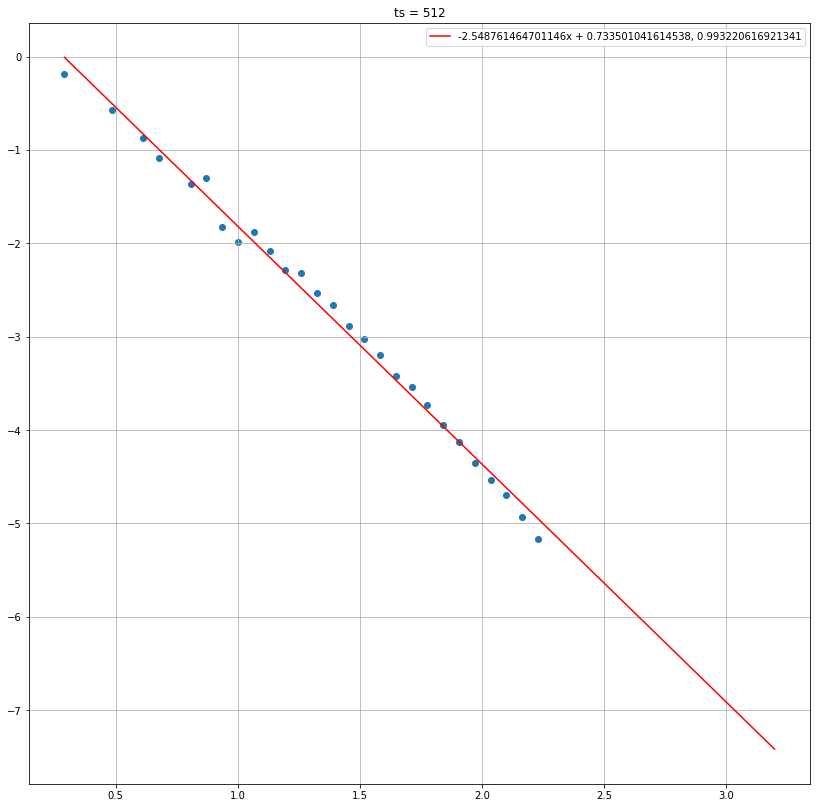

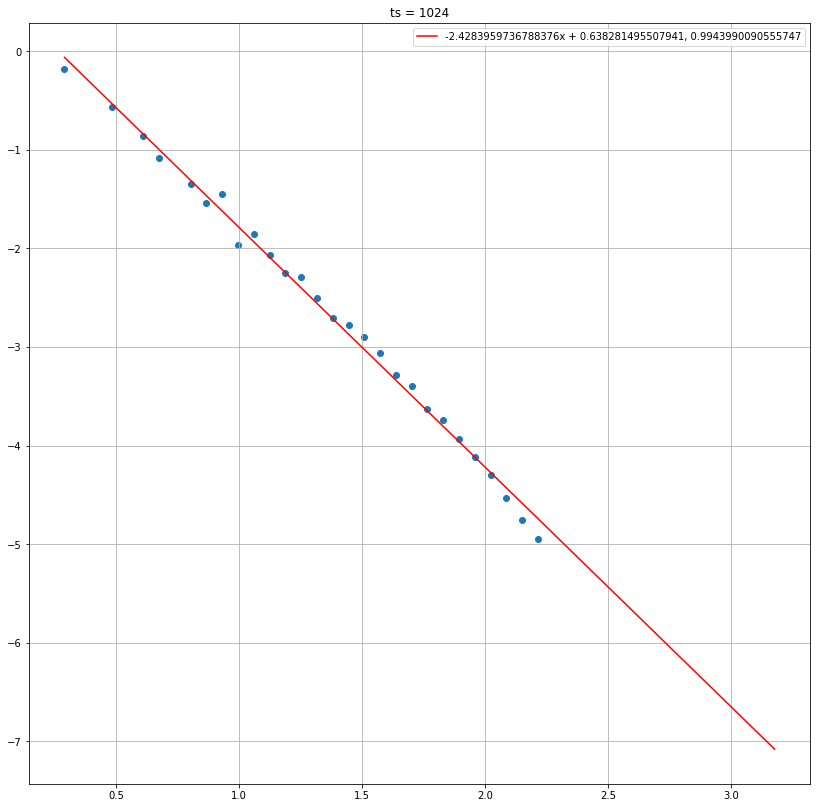

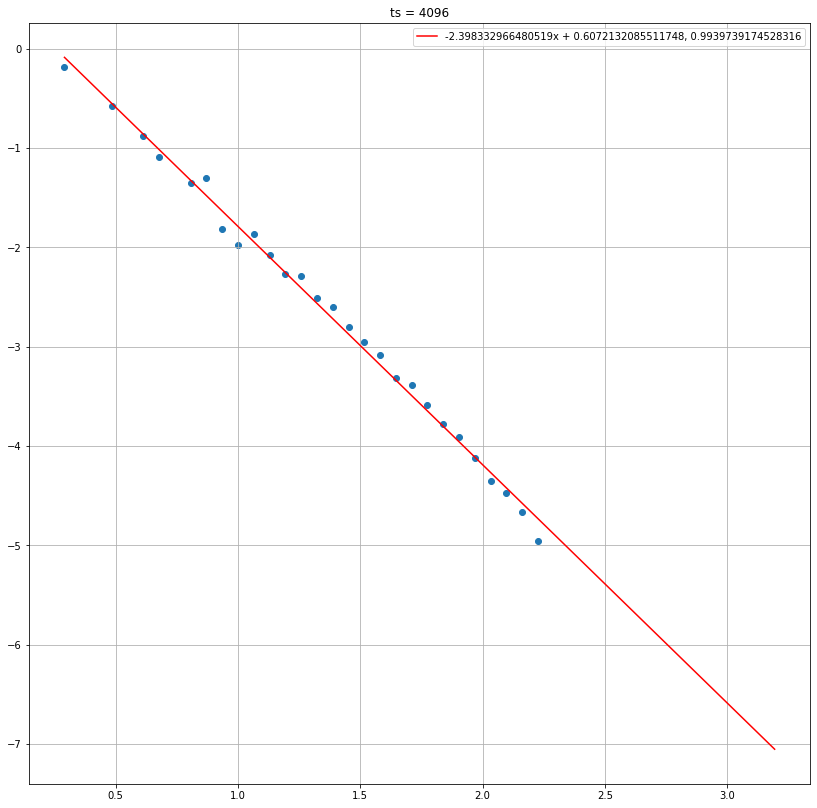

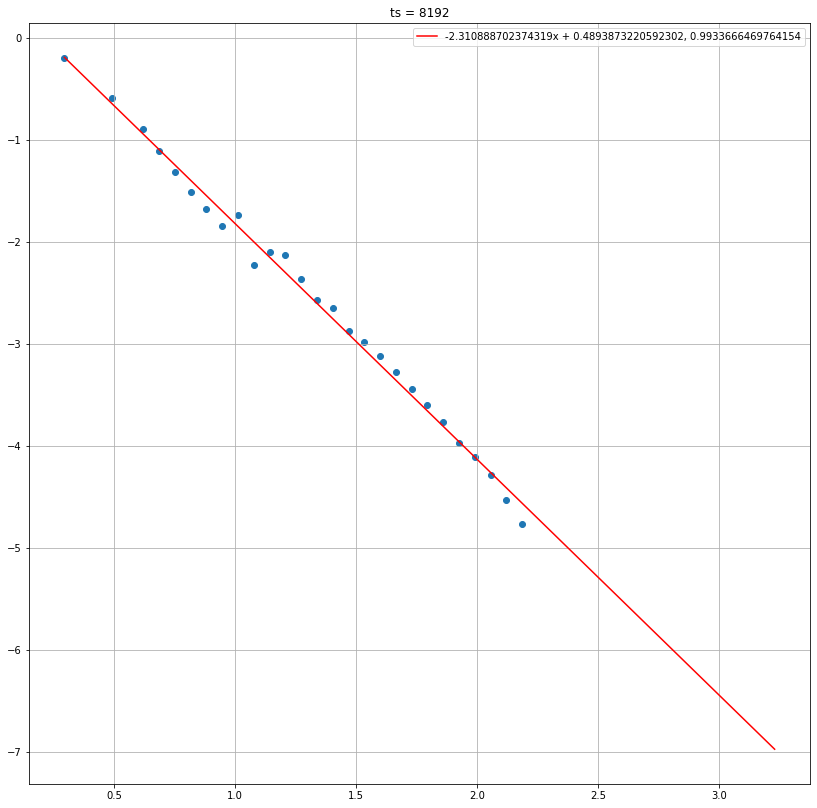

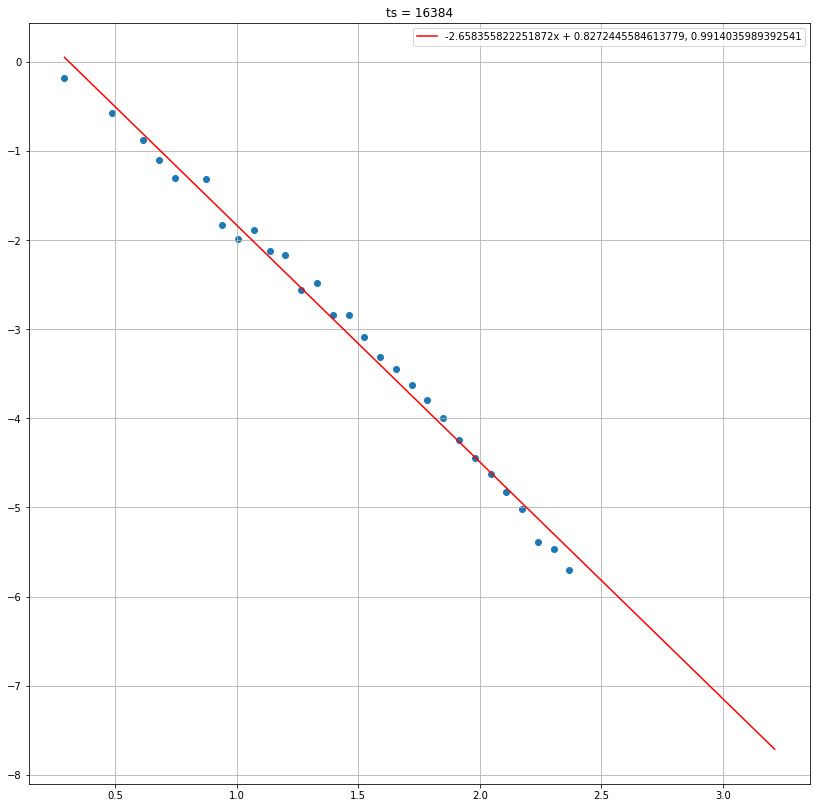

In [111]:
n= 27
for i in curve_data:
    coef = 0
    coef2 = 0
    r2 = 0
    number_best = 0
    r2best = 0
    plt.figure(figsize=(14,14))
    plt.title("ts = %d" %i[0])

    for j in range(len(i[1])):
        if i[j] >= 1:
            break 

    
    x = i[1][j:]
    y = i[2][j:]
    N = len(x)
    for j in range(n,N):
        coef,coef2,r2 = regree(x[:j],y[:j])
        if(r2 > r2best):
            r2best = r2
            number_best = j
    coef,coef2,r2 = regree(x[:number_best],y[:number_best])
    print(number_best)
    plt.scatter(x[:number_best],y[:number_best])
    plt.plot(x,x*coef+coef2,c = 'red',label = f'{coef}x + {coef2}, {r2}')
    plt.grid()
    plt.legend()
plt.show()

(2, array([0.29820594, 0.46086373, 0.62352152, 0.67774078, 0.7861793 ,
       0.84039857, 0.89461783, 0.94883709, 1.00305635, 1.05727562,
       1.11149488, 1.16571414, 1.2199334 , 1.27415267, 1.32837193,
       1.38259119, 1.43681045, 1.49102972, 1.54524898, 1.59946824,
       1.6536875 , 1.70790676, 1.76212603, 1.81634529, 1.87056455,
       1.92478381, 1.97900308, 2.03322234, 2.0874416 , 2.14166086,
       2.19588013, 2.25009939, 2.30431865, 2.35853791, 2.41275718,
       2.46697644, 2.5211957 , 2.57541496, 2.62963423, 2.68385349]), array([-0.19633209, -0.55952091, -0.90539549, -1.08890777, -1.30880769,
       -1.48615553, -1.63757012, -1.77431321, -1.90599146, -1.76360367,
       -2.21141271, -2.00206275, -2.13448135, -2.07448574, -2.32936446,
       -2.27488629, -2.31567382, -2.61505031, -2.57076107, -2.70997469,
       -2.87566794, -2.81693728, -3.07638301, -3.17016709, -3.30447467,
       -3.45211562, -3.60566437, -3.77128689, -3.91005107, -3.97002267,
       -4.02811958, -3.944

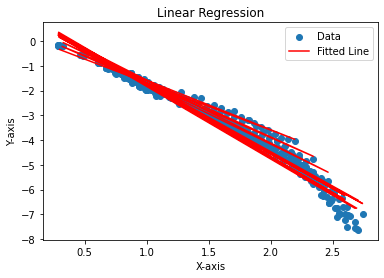

In [50]:
cut = [2.25, 2.4, 2.49, 2.61, 2.75, 2.75, 2.75, 2.75, 2.75, 2.75]
curve_index = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# Accumulate data for all curves
all_x = []
all_y = []
all_y_pred = []

for i in curve_index:
    slope, intercept, mse, r2, x, y, y_pred = analyse_data_ava(curve_data, i, cut[i])
    
    # Accumulate the x, y, and predicted y values
    all_x.extend(x)
    all_y.extend(y)
    all_y_pred.extend(y_pred)
    
    # Print the regression results for each curve
    print(f"Curve {i+1} - Angular Coefficient (Slope): {slope}, Intercept: {intercept}")
    print(f"Mean Squared Error (MSE): {mse}, R-squared (R2) Score: {r2}")
    print("------------------------------------")

# Plot all curves in a single graph
plt.scatter(all_x, all_y, label='Data')
plt.plot(all_x, all_y_pred, color='red', label='Fitted Line')

# Set labels and title
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Linear Regression")

# Set legend
plt.legend()

# Show the plot
plt.show()


In [24]:
slope, intercept, mse, r2, x, y, y_pred = analyse_data_ava(curve_data, 0, 2.75)


(2, array([0.29820594, 0.46086373, 0.62352152, 0.67774078, 0.7861793 ,
       0.84039857, 0.89461783, 0.94883709, 1.00305635, 1.05727562,
       1.11149488, 1.16571414, 1.2199334 , 1.27415267, 1.32837193,
       1.38259119, 1.43681045, 1.49102972, 1.54524898, 1.59946824,
       1.6536875 , 1.70790676, 1.76212603, 1.81634529, 1.87056455,
       1.92478381, 1.97900308, 2.03322234, 2.0874416 , 2.14166086,
       2.19588013, 2.25009939, 2.30431865, 2.35853791, 2.41275718,
       2.46697644, 2.5211957 , 2.57541496, 2.62963423, 2.68385349]), array([-0.19633209, -0.55952091, -0.90539549, -1.08890777, -1.30880769,
       -1.48615553, -1.63757012, -1.77431321, -1.90599146, -1.76360367,
       -2.21141271, -2.00206275, -2.13448135, -2.07448574, -2.32936446,
       -2.27488629, -2.31567382, -2.61505031, -2.57076107, -2.70997469,
       -2.87566794, -2.81693728, -3.07638301, -3.17016709, -3.30447467,
       -3.45211562, -3.60566437, -3.77128689, -3.91005107, -3.97002267,
       -4.02811958, -3.944

TypeError: cannot unpack non-iterable NoneType object